<a href="https://colab.research.google.com/github/geoffwoollard/learn_cryoem_math/blob/master/nb/hobbie_roth_fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goal
* build intuition of Fourier transforms



# End of chapter problems in `Hobbie, R. K., & Roth, B. J. (2007). Chapter 12: Images in Intermediate Physics for Medicine and Biology (4th ed.). New York, NY: Springer New York. http://doi.org/10.1007/978-0-387-49885-0`

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
# problem 6c. generalize to any angle, draw circle

N=100
nx, ny = (N, N)
x = np.linspace(-1, 1, nx)
y = np.linspace(-1, 1, ny)
xv, yv = np.meshgrid(x, y)





In [0]:
def comp_fxy(theta,k):
  kxx_kyy = k*(xv*np.cos(theta)+yv*np.sin(theta))
  c = np.cos(kxx_kyy)
  s = np.sin(kxx_kyy)
  return(c,s)

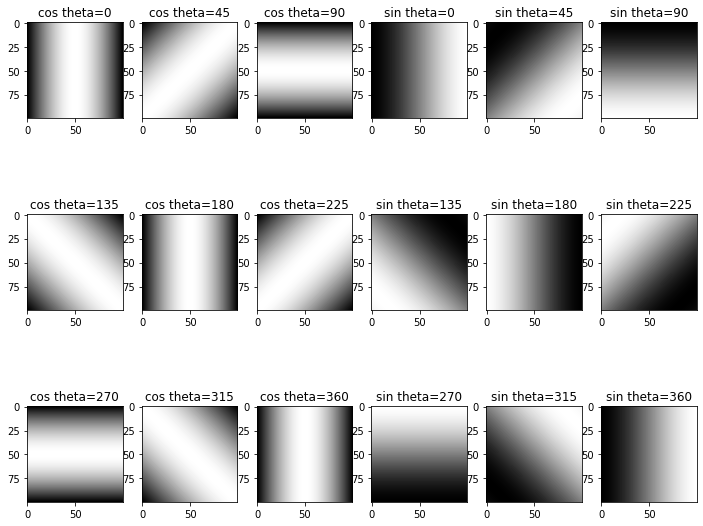

In [0]:
rows, cols = 3,3
fig, axes = plt.subplots(rows,cols*2,figsize=(12,10))

theta_N = rows*cols
thetas = np.linspace(0,2*np.pi,theta_N)

for r in range(rows):
  for c in range(cols):
    cos,sin = comp_fxy(thetas[r*cols + c],k=np.sqrt(1**2*2))
    axes[r,c].imshow(cos,cmap='gray')
    axes[r,c].set_title('cos theta=%i' % (180*thetas[r*cols + c]/np.pi))
    axes[r,cols + c].imshow(sin,cmap='gray')
    axes[r,cols + c].set_title('sin theta=%i' % (180*thetas[r*cols + c]/np.pi))


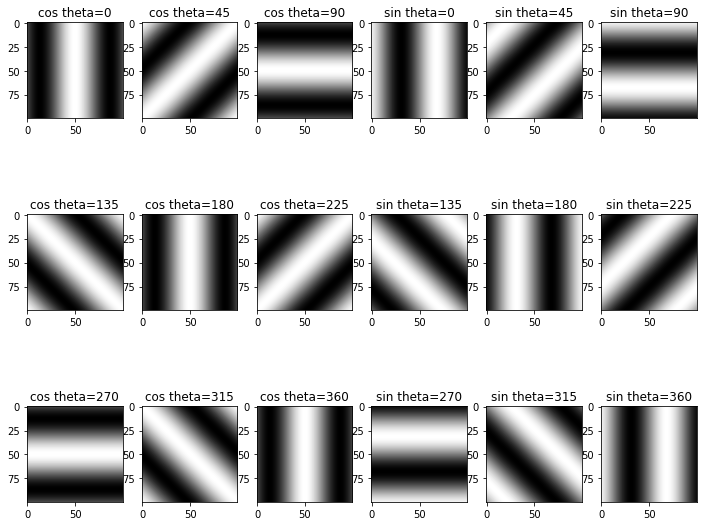

In [0]:
rows, cols = 3,3
fig, axes = plt.subplots(rows,cols*2,figsize=(12,10))

theta_N = rows*cols
thetas = np.linspace(0,2*np.pi,theta_N)

for r in range(rows):
  for c in range(cols):
    cos,sin = comp_fxy(thetas[r*cols + c],k=np.sqrt(3**2*2))
    axes[r,c].imshow(cos,cmap='gray')
    axes[r,c].set_title('cos theta=%i' % (180*thetas[r*cols + c]/np.pi))
    axes[r,cols + c].imshow(sin,cmap='gray')
    axes[r,cols + c].set_title('sin theta=%i' % (180*thetas[r*cols + c]/np.pi))


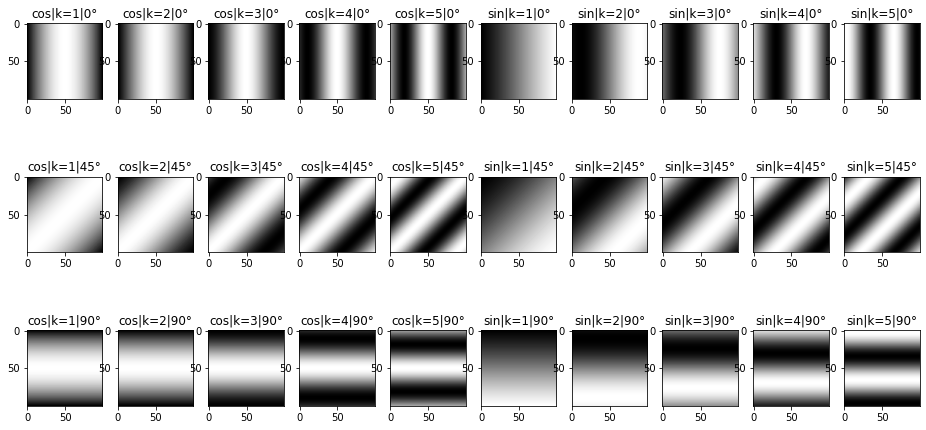

In [0]:
rows, cols = 3,5
fig, axes = plt.subplots(rows,cols*2,figsize=(16,8))

theta_N = rows
thetas = np.linspace(0,np.pi/2,theta_N)
ks = np.arange(1,cols+1)


for r in range(rows):
  for c in range(cols):
    cos,sin = comp_fxy(thetas[r],k=ks[c])
    axes[r,c].imshow(cos,cmap='gray')
    axes[r,c].set_title('cos|k=%i|%i\u00b0' % (ks[c],180*thetas[r]/np.pi))
    axes[r,cols + c].imshow(sin,cmap='gray')
    axes[r,cols + c].set_title('sin|k=%i|%i\u00b0' % (ks[c],180*thetas[r]/np.pi))


# Problem 8
$$ f(x,y) = 1 \ ; -a/2 < x < a/2, \ -b/2<y<b/2 \ ; 0 \text{ else}$$


In [0]:
N=50
nx, ny = (N, N)
xmax = 3
x = np.linspace(-xmax, xmax, nx)
y = np.linspace(-xmax, xmax, ny)
xv, yv = np.meshgrid(x, y)

def comp_cf(kxv,kyv,a,b):
  akx = a*kxv/2
  bkv =  b*kyv/2
  th_pp = akx + bkv
  th_pn =  akx - bkv
  th_np = -th_pn
  th_nn = -th_pp
  cf = -np.cos(th_pp) + np.cos(th_np) + np.cos(th_pn) - np.cos(th_nn)
  cf /= kxv
  cf /= kyv
  return(cf)
cf = comp_cf(kxv,kyv,a=2,b=1)

plt.imshow(cf,cmap='gray')

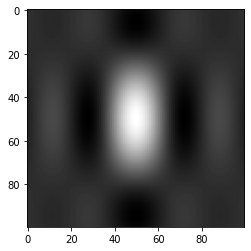

In [0]:
N=50
nkx, nky = (N, N)
kmax = 10
kx = np.linspace(-kmax, kmax, nkx)
ky = np.linspace(-kmax, kmax, nky)
kxv, kyv = np.meshgrid(kx, ky)

def comp_cf(kxv,kyv,a,b):
  akx = a*kxv/2
  bkv =  b*kyv/2
  th_pp = akx + bkv
  th_pn =  akx - bkv
  th_np = -th_pn
  th_nn = -th_pp
  cf = -np.cos(th_pp) + np.cos(th_np) + np.cos(th_pn) - np.cos(th_nn)
  cf /= kxv
  cf /= kyv
  return(cf)

b=1
cf = comp_cf(kxv,kyv,a=2*b,b=b)
plt.imshow(cf,cmap='gray')

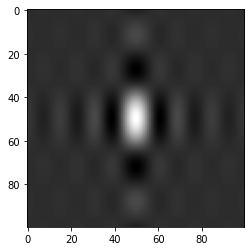

In [0]:
b=2
cf = comp_cf(kxv,kyv,a=2*b,b=b)
plt.imshow(cf,cmap='gray')

# Problem 14
$$C_{f_1}(k) = \sin(k)/k$$
$$S_{f_1}(k) = (1-\cos(k))/k$$

$$C_{f_2}(k) = \frac{\sqrt{3/2}}{k}\big[\sin(k/3)+\sin(k)-\sin(2k/3)\big]$$
$$S_{f_2}(k) = \frac{\sqrt{3/2}}{k}\big[-\cos(k/3)+1-\cos(k) + \cos(2k/3)\big]$$

$$a(k) = [C(k)^2 + S(k)^2]^{1/2}$$

$$\text{NB:} \int dx \ f_1^2(x) = \int dx \ f_2^2(x) = 1$$

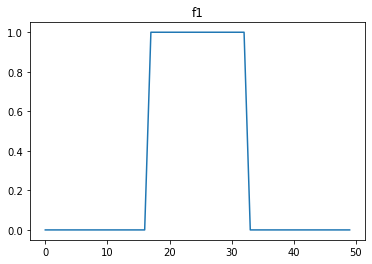

In [0]:
f1 = np.linspace(-1,2,50)
f1 = np.logical_and(0<f1,f1 < 1)
pd.Series(f1.astype(int)).plot(title='f1')

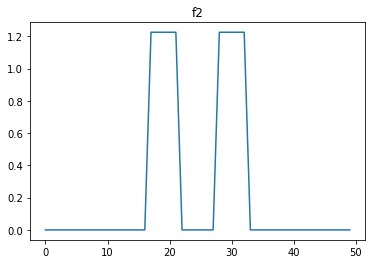

In [0]:
f2 = np.linspace(-1,2,50)
f2i = np.logical_and(0<f2,f2 < 1/3)
f2f = np.logical_and(2/3<f2,f2 < 1)
f2 = np.sqrt(3/2)*np.logical_or(f2i,f2f).astype(int)
pd.Series(f2).plot(title='f2')

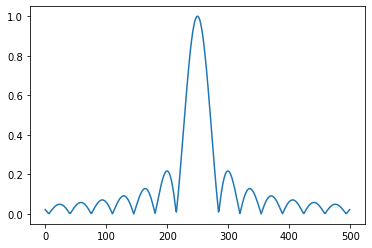

In [0]:
def comp_a1(k):
  '''
  a1(k) defined as one 1
  '''

  a1 = np.sqrt(2*(1-np.cos(k))/k**2)
  return(a1)

k = np.linspace(-45,45,500)
pd.Series(comp_a1(k)).plot(title='a1')


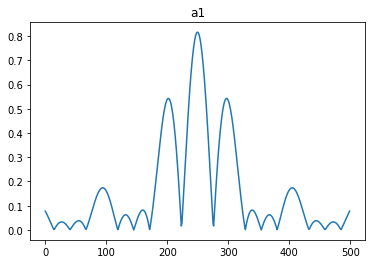

In [0]:
def comp_a2(k):
  c2_k = np.sin(k/3) + np.sin(k) - np.sin(2*k/3)
  s2_k = -np.cos(k/3) + 1 - np.cos(k) + np.cos(2*k/3)
  a2 = np.sqrt(3/2*(c2_k**2 + s2_k**2)) / np.abs(k)
  return(a2)
pd.Series(comp_a2(k)).plot(title='a1')

Note the increased components of k close to the origin but a bit spaced out. These are the higher frequency components

# Problem 20
* Bilinear Interpolation
$$C[x_n,y_m] = \frac{1}{\Delta \theta \Delta r}\big[
\\ C(r_i,\theta_j)(r_{i+1}-r)(\theta_{j+1}-\theta)
\\+C(r_{i+1},\theta_j)(r-r_i)(\theta_{j+1}-\theta)
\\+ C(r_i,\theta_{j+1})(r_{i+1}-r)(\theta-\theta_j)
\\+C(r_{i+1},\theta_{j+1})(r-r_i)(\theta-\theta_j) 
\big]
$$
$$ \text{where }\Delta \theta = \pi/8 \approx 0.392_6, \  \Delta r = 0.5$$
## $\Delta \theta$
* As we move further out in $r$, the $\Delta \theta$ grid points are further away ($r\Delta \theta$). Setting $r=x_{max}$, and $N\Delta x =  x_{max}$ we have
$$x_{max}\Delta \theta \sim x_{max}/N \implies  \Delta \theta \sim 1/N$$

##$\Delta r$
* Should not be larger than (x,y) grid spacing
$$ \Delta r \sim$ $\Delta x = x_{max}/N $$


In [0]:
def comp_cri_tj_sinc(ri,tj):
  if np.isclose(ri,0):
    cri = 1
  else:
    cri = np.sin(ri)/ri
  return(cri)


def comp_bi_cnm(x,y,dr=0.5,dt=np.pi/8,comp_cri_tj=comp_cri_tj_sinc):
  t=np.arctan2(y,x)
  r=np.sqrt(x**2+y**2)
  ri = np.floor(r/dr)*dr
  ri1 = ri+dr
  tj = np.floor(t/dt)*dt
  tj1 = tj + dt
  ri1_r = ri1 - r
  r_ri = r - ri
  tj1_t = tj1 - t
  t_tj = t - tj
  cnm = \
  comp_cri_tj(ri,tj)*ri1_r*tj1_t \
  + comp_cri_tj(ri1,tj)*r_ri*tj1_t \
  + comp_cri_tj(ri,tj1)*ri1_r*t_tj \
  + comp_cri_tj(ri1,tj1)*r_ri*t_tj 

  cnm /= (dt*dr)
  return(cnm)
comp_bi_cnm(x=2,y=3,dr=0.5,dt=np.pi/8)



-0.11900701818463824

In [0]:
def set_up_grid(N,xmax=10):
  #N=500
  nx, ny = (N, N)
  x = np.linspace(-xmax, xmax, nx)
  y = np.linspace(-xmax, xmax, ny)
  xv, yv = np.meshgrid(x, y)
  return(x,y,xv,yv)
x,y,xv,yv = set_up_grid(N=500,xmax=10)

Text(0.5, 1.0, 'analytic')

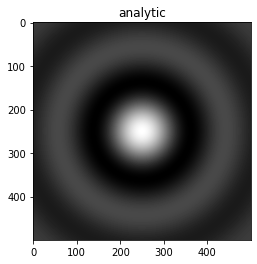

In [0]:
r=np.sqrt(xv**2+yv**2)
plt.imshow(np.sin(r)/r,cmap='gray')
plt.title('analytic')

In [0]:
def comp_f_bi(N,xmax=10,dr=0.5,dt=np.pi/8):
  x,y,xv,yv = set_up_grid(N=N,xmax=xmax)
  f_bi = np.zeros_like(xv)
  for x_idx in range(x.shape[0]):
    for y_idx in range(y.shape[0]):
      f_bi[x_idx,y_idx] = comp_bi_cnm(x=x[x_idx],y=y[y_idx],dr=dr,dt=dt)
  return(f_bi)

-1 0
True
0 1
0 2
0 3
0 4
0 5
True
1 1
1 2
1 3
1 4


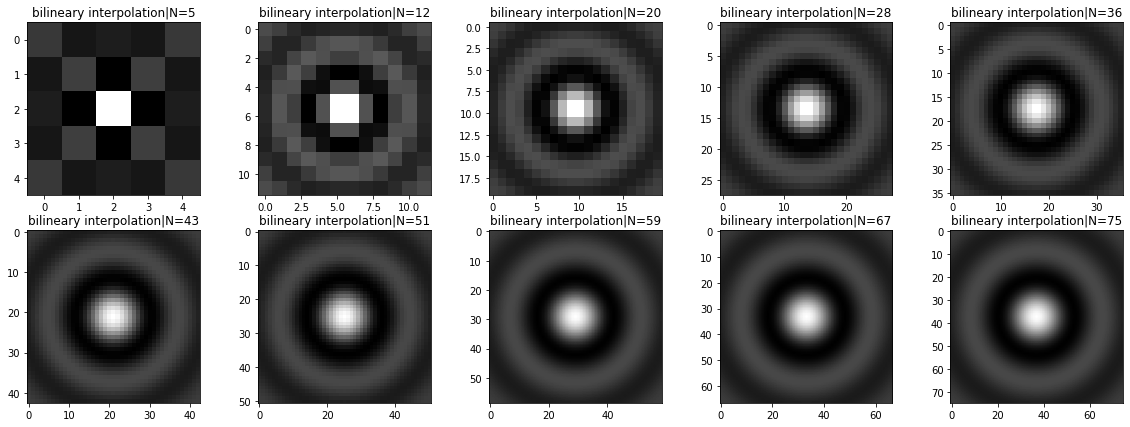

In [0]:
rows=2
cols=5
fig,axes = plt.subplots(rows,cols,figsize=(20,7))
r=-1
c=0
for N in np.linspace(5,75,rows*cols).astype(int):
  print(r,c)
  if c % 5 == 0: 
    print(True)
    r+=1
    c=0
  axes[r,c].imshow(comp_f_bi(N=N),cmap='gray')
  axes[r,c].title.set_text('bilineary interpolation|N=%i'%N)
  c+=1

The grid spacing in $r$ and $\theta$ should be a bit smaller than the grid in $x,y$ space. There is no $\theta$ dependence in this particular example, but let's see how the error (between the analytic function and the bilinear interpolated function) changes when the $\Delta r$ spacing changes.

Text(0.5, 1.0, 'analytic')

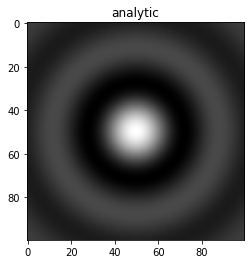

In [0]:
r=np.sqrt(xv**2+yv**2)
f_analytic = np.sin(r)/r
plt.imshow(f_analytic,cmap='gray')
plt.title('analytic')

(0.5729577951308232, 0.1)

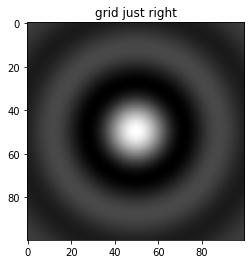

In [0]:
N=100
xmax=10
x,y,xv,yv = set_up_grid(N=N,xmax=xmax)
dt = 1/N
dr = xmax/N

plt.imshow(comp_f_bi(N=N,xmax=xmax,dr=dr,dt=dt),cmap='gray')
plt.title('grid just right')
dt*180/np.pi, dr # half a degree and half a step 0.1


In [0]:
N=100
xmax=10
x,y,xv,yv = set_up_grid(N=N,xmax=xmax)
dt = 1/N # there is no theta dependence so it doesn't matter
dr = xmax/N
r_list, theta_list, error_list = [],[],[]
f_analytic_norm = np.linalg.norm(f_analytic)

for dr_ in [dr/30,dr/10,dr/3] + np.linspace(dr,20*dr,20).tolist():
  #for dt_ in np.linspace(dt,20,10):
  error = np.linalg.norm(f_analytic-comp_f_bi(N=N,xmax=xmax,dr=dr_,dt=dt_)) / f_analytic_norm
  print(dr_,dt_,error)
  r_list.append(dr_)
  # theta_list.append(theta)
  error_list.append(error)
df = pd.DataFrame({'dr':r_list,
                  #'theta':theta_list,
                   'error':error_list})




0.0033333333333333335 20.0 6.867129348604965e-07
0.01 20.0 6.1217682712225725e-06
0.03333333333333333 20.0 6.889300636460358e-05
0.1 20.0 0.0006257484667835188
0.2 20.0 0.002414230881180069
0.3 20.0 0.005549318993930403
0.4 20.0 0.0098340328573416
0.5 20.0 0.015366142930146673
0.6 20.0 0.02209415692802406
0.7 20.0 0.03004367945981909
0.7999999999999999 20.0 0.039166942385319654
0.8999999999999999 20.0 0.049395921021230554
0.9999999999999999 20.0 0.06076684501631112
1.0999999999999999 20.0 0.07336024377638888
1.2 20.0 0.08725608605354704
1.3 20.0 0.10189859421993666
1.4 20.0 0.11768615936184851
1.5 20.0 0.1346764846235652
1.5999999999999999 20.0 0.1529585591138751
1.7 20.0 0.1707950481081317
1.8 20.0 0.1924929230980564
1.9 20.0 0.21335669622458095
2.0 20.0 0.23311909653583582


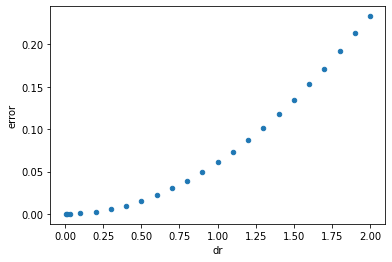

In [0]:
df.plot.scatter(x='dr',y='error')

Text(0.5, 1.0, 'dr=0.10 (0.06 percent error)')

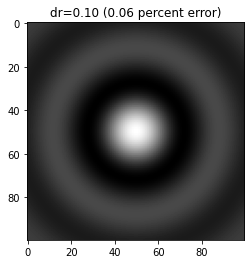

In [0]:

f_bi = comp_f_bi(N=N,xmax=xmax,dr=dr,dt=dt)
error = np.linalg.norm(f_analytic - f_bi) / f_analytic_norm
plt.imshow(f_bi,cmap='gray')
plt.title('dr=%.2f (%.2f percent error)' % (dr,100*error))

Text(0.5, 1.0, 'dr=0.50 (1.54 percent error)')

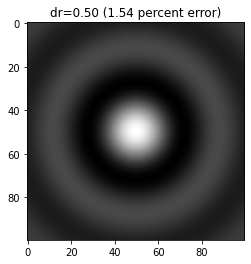

In [0]:
dr_coarse = 5*dr
f_bi = comp_f_bi(N=N,xmax=xmax,dr=dr_coarse,dt=dt)
error = np.linalg.norm(f_analytic - f_bi) / f_analytic_norm
plt.imshow(f_bi,cmap='gray')
plt.title('dr=%.2f (%.2f percent error)' % (dr_coarse,100*error))

Text(0.5, 1.0, 'dr=1.00 (6.08 percent error)')

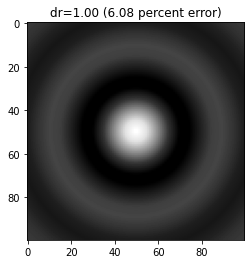

In [0]:
dr_coarse = 10*dr
f_bi = comp_f_bi(N=N,xmax=xmax,dr=dr_coarse,dt=dt)
error = np.linalg.norm(f_analytic - f_bi) / f_analytic_norm
plt.imshow(f_bi,cmap='gray')
plt.title('dr=%.2f (%.2f percent error)' % (dr_coarse,100*error))

# Problem 26
* The function is a point at some arbitrary location $(x_0,y_0)$
$$f(x,y) = \delta (x-x_0) \delta (y-y_0)$$
* $F(\theta, x^\prime)$ can be solved for analytically
$$F(\theta, x^\prime) = \int dy^\prime 
\delta([x^\prime\cos\theta-y^\prime\sin\theta] - x_0)
\delta([x^\prime\sin\theta+y^\prime\cos\theta]- y_0) \\
 = \delta(x^\prime - x_0\cos\theta - y_0\sin\theta)
$$
* $f_b(x,y) = \int_0^\pi d\theta \ F(\theta, x^\prime) = 
\frac{1}{\sqrt{(x-x_0)^2+(y-y_0)^2}}$
* This is the same thing as convoluting $f$ with $h=1/r$
$$f_b(x,y) = \int \int dy^\prime dx^\prime f(x^\prime,y^\prime)h(x-x^\prime,y-y^\prime) \\
\int \int dy^\prime dx^\prime \delta(x^\prime-x_0) \delta(y^\prime-y_0)h(x-x^\prime,y-y^\prime) \\
= h(x-x_0,y-y_0) = \frac{1}{\sqrt{(x-x_0)^2+(y-y_0)^2}}
$$
* This unfiltered back projection spreads out the point, decaying with the inverse distance from the point

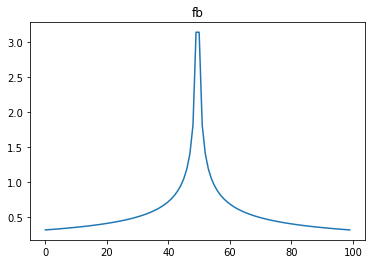

In [5]:
X = np.linspace(-10,10,100)
fb = np.sqrt(X**2)**-.5
pd.Series(fb).plot(title='fb')